<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson9/PCA_sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

sns.set(font_scale=1.3)

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

# Метод главных компонент
### (Principal component analysis, PCA)


Интерактивная визуализация PCA и собственных векторов:

* <a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis</a>

* <a href="http://setosa.io/ev/eigenvectors-and-eigenvalues/">Eigenvectors and Eigenvalues</a>

## PCA

Реализация из sklearn:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA">`sklearn.decomposition.PCA`</a>`(n_components=None)`

Методы класса:
* `fit(X)` — обучиться на данных `X`;
* `fit_transforn(X)` — обучиться на данных `X` и вернуть сжатое представление `X`;
* `transform(X_new)` — вернуть сжатое представление `X_new` для обученной ранее модели;
* `inverse_transform(Y)` — восстановить сжатые данные `Y` в исходное пространство.

Атрибуты класса:

* `components_` — главные компоненты в порядке убывания собственных чисел, размер (n_components, n_features);
* `explained_variance_` — дисперсия вдоль главных компонент, равны собственным числам, размер (n_components,);
* `explained_variance_ratio_` —- доля дисперсии, объясняемая каждой компонентой, размер (n_components,);
* `mean_` — среднее по данным, размер (n_components,);
* `noise_variance_` — оценка дисперсии шума для метода Probabilistic PCA.

Другие модификации, реализованные в sklearn:

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA">`KernelPCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA">`SparsePCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA">`IncrementalPCA`</a>.

Генерируем двумерный датасет из нормального распределения.

In [2]:
X = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 3],
                                     cov=[[3, 1], [1, 1]])

Применяем PCA с одной главной компонентой.

In [4]:
pca = PCA(n_components=1).fit(X)# ваш код
Y = pca.transform(X)# ваш код
X_hat = pca.inverse_transform(Y)# ваш код

Его главные компоненты (точнее, одна компонента) — двумерные векторы.

In [11]:
pca.components_

array([[0.94699436, 0.32125019]])

Вектор средних:

In [12]:
pca.mean_

array([0.00837667, 3.08392941])

На первом графике синим отмечены исходные точки, красным - они же после проецирования и обратного преобразования.
На втором графике точки в одномерном пространстве.

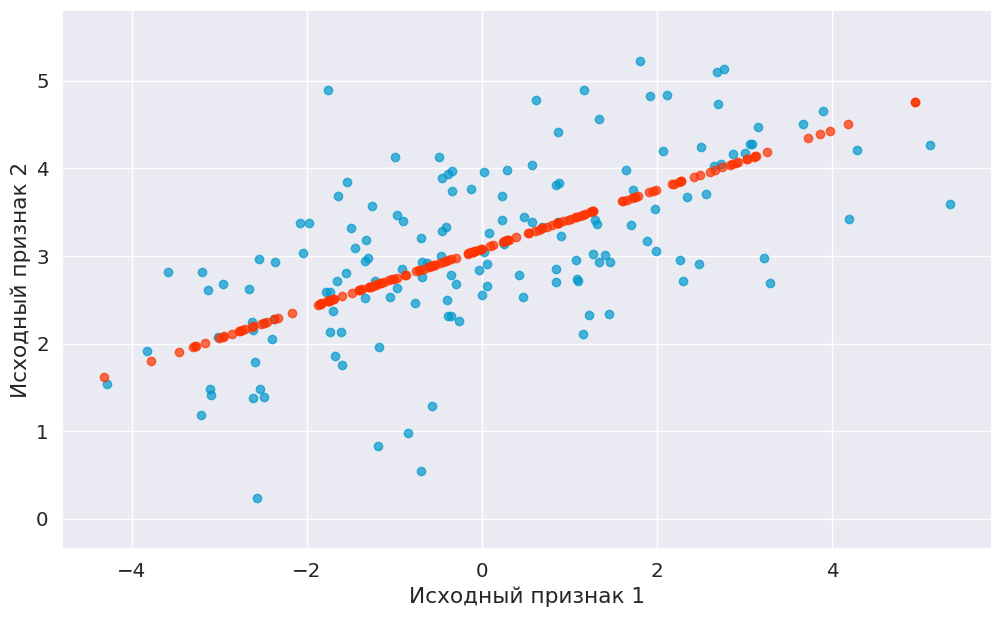

In [13]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
plt.scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), alpha=0.5, color=red)
plt.xlabel('Проекция на первую главную компоненту')
plt.show()

Сгенерируем и визуализируем два хорошо разделимых класса из нормального распределения с отличающимися векторами средних.

In [14]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[4, 3],
                                     cov=[[2, 1], [1, 2]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 6],
                                     cov=[[2, 1], [1, 2]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.7, cmap='rainbow')
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 9)), plt.ylim((-1, 10))
plt.axis('equal')
plt.show()

Проецируем на одномерное подпространство, тут хорошо заметна пространственная структура классов. При помощи метода `inverse_transform`, применненного к результату разложения на нужное количество компонент, можно получить проекции на эти компоненты.

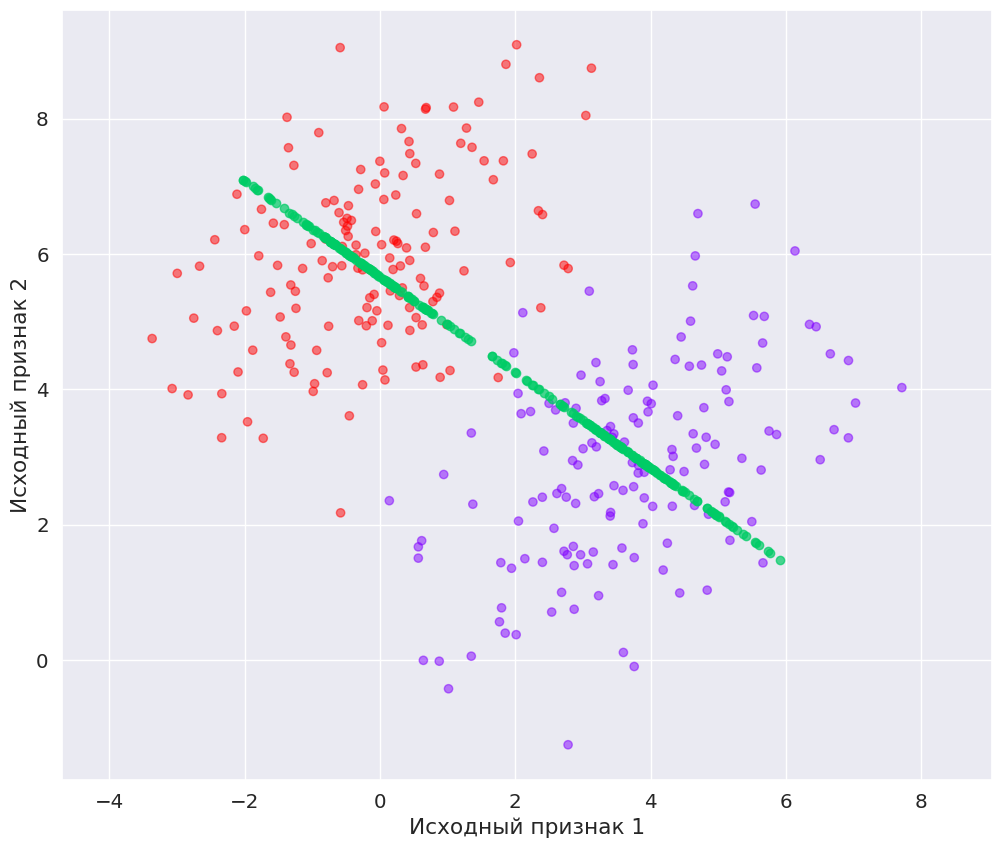

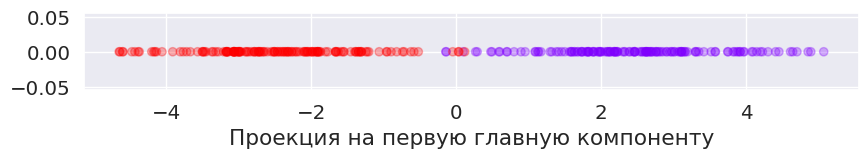

In [20]:
pca = PCA(n_components=1).fit(X) # ваш код
Y = pca.transform(X) # ваш код
X_hat = pca.inverse_transform(Y)# ваш код

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='rainbow')
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=green, alpha=0.7)
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 9)), plt.ylim((-1, 10))
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), c=c, alpha=0.3, cmap='rainbow')
plt.xlabel('Проекция на первую главную компоненту')
plt.show()

А что, если два вытянутых класса, расположенных близко, как на рисунке ниже? Сгенерируем и визуализируем такие классы.

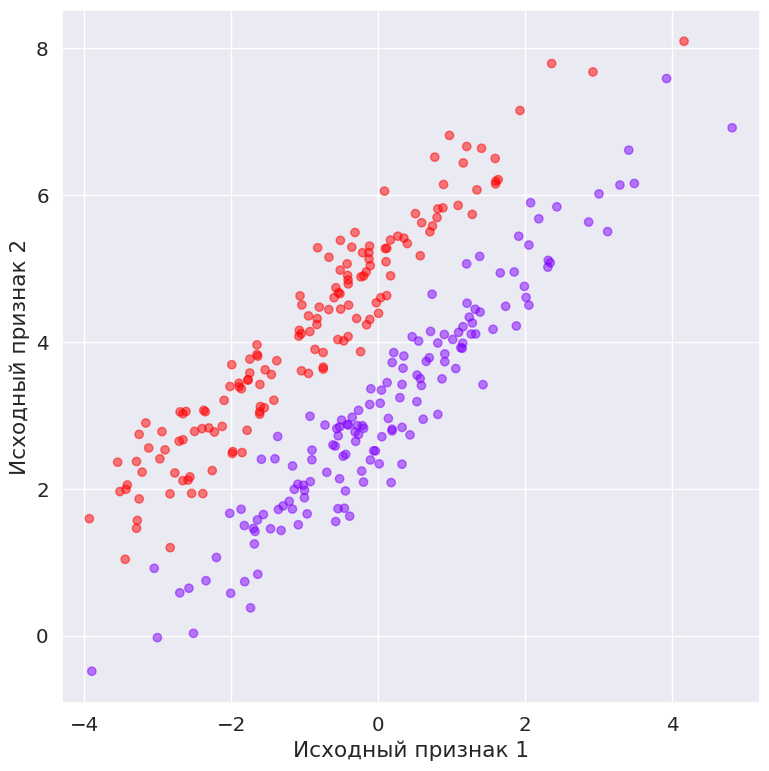

In [21]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 3],
                                     cov=[[2, 1.9], [1.9, 2]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[-1, 4],
                                     cov=[[2, 1.9], [1.9, 2]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

plt.figure(figsize=(9, 9))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='rainbow')
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 5)), plt.ylim((-1, 9))
plt.axis('equal')
plt.show()

Главная компонента направлена вдоль этих классов, и при проецировании точки классов смешаются.

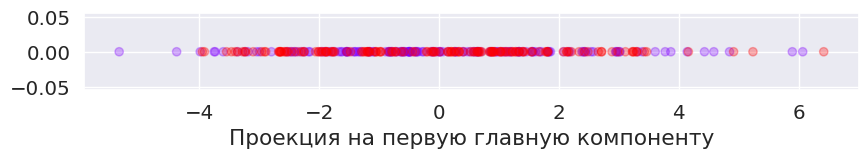

In [22]:
pca = PCA(n_components=1).fit(X) # ваш код
Y = pca.transform(X) # ваш код
X_hat = pca.inverse_transform(Y)# ваш код

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='rainbow')
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=green, alpha=0.7)
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 5)), plt.ylim((-1, 9))
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), c=c, alpha=0.3, cmap='rainbow')
plt.xlabel('Проекция на первую главную компоненту')
plt.show()

Генерируем трехмерный датасет из нормального распределения.

In [23]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[-2, 1, 0],
                                     cov=[[3, -1, 1],
                                          [-1, 4, 0.5],
                                          [1, 0.5, 1.5]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[7, 3, 4],
                                     cov=[[3, 2, 1],
                                          [2, 4, 0.5],
                                          [1, 0.5, 1.5]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

Визуализируем датасет.

In [24]:
sns.set(font_scale=1.3, style='whitegrid')

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           s=50, c=c, alpha=0.5, cmap='rainbow')
ax.set_xlabel('Исходный признак 1')
ax.set_ylabel('Исходный признак 2')
ax.set_zlabel('Исходный признак 3')
# ax.axis('equal')
plt.show()

Посмотрим на проекции на две первые главные компоненты.

In [25]:
pca = PCA(n_components=2).fit(X) # ваш код
Y = pca.transform(X) # ваш код
X_hat = pca.inverse_transform(Y)# ваш код

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           s=50, c=c, alpha=0.5, cmap='rainbow')
ax.scatter(X_hat[:, 0], X_hat[:, 1], X_hat[:, 2],
           s=20, c='green', alpha=0.9)
ax.set_xlabel('Исходный признак 1')
ax.set_ylabel('Исходный признак 2')
ax.set_zlabel('Исходный признак 3')
# ax.axis('equal')
plt.show()

sns.set(font_scale=1.3)
plt.figure(figsize=(6, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=c, alpha=0.3, cmap='rainbow')
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.axis('equal')
plt.show()

Нарисуем интерактивный график для удобной визуализации.

In [26]:
fig = go.Figure()
fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
)

fig.add_trace(go.Scatter3d(
    x=X[c==0, 0], y=X[c==0, 1], z=X[c==0, 2], mode='markers',
    marker={'size': 7, 'opacity': 0.65, 'color': red}
))

fig.add_trace(go.Scatter3d(
    x=X[c==1, 0], y=X[c==1, 1], z=X[c==1, 2], mode='markers',
    marker={'size': 7, 'opacity': 0.65, 'color': blue}
))

fig.add_trace(go.Scatter3d(
    x=X_hat[:, 0], y=X_hat[:, 1], z=X_hat[:, 2], mode='markers',
    marker={'size': 4, 'opacity': 0.9, 'color': green}
))

fig.update_layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
        scene = dict(
            xaxis_title='Признак 1',
            yaxis_title='Признак 2',
            zaxis_title='Признак 3',
        )
    )

# Отображение.
plotly.offline.iplot(fig)